# Regression Modeling in Practice
# Assignment: Test a Multiple Regression Model

Following is the Python program I wrote to fulfill the third assignment of the [Regression Modeling in Practice online course](https://www.coursera.org/learn/regression-modeling-practice).

I decided to use [Jupyter Notebook](http://nbviewer.jupyter.org/github/ipython/ipython/blob/3.x/examples/Notebook/Index.ipynb) as it is a pretty way to write code and present results.

## Assignment research question

Using the [Gapminder database](http://www.gapminder.org/), I would like to see if there is a relationship between the income per person (explanatory variable) and the residential consumption of electricity (response variable).

The following variables will be tested also to improve the prediction model and figure out potential confounders:

- Employment rate (total employees age of 15+)
- Oil consumption per person (tonnes per year per person)
- Urban rate (Urban population in %)


## Data management

For the question I'm interested in, the countries for which data are missing will be discarded. As missing data in Gapminder database are replaced directly by `NaN` no special data treatment is needed.

In [2]:
# Magic command to insert the graph directly in the notebook
%matplotlib inline
# Load a useful Python libraries for handling data
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [3]:
# Read the data
data_filename = r'gapminder.csv'
data = pd.read_csv(data_filename, low_memory=False)
data = data.set_index('country')

General information on the Gapminder data

In [4]:
display(Markdown("Number of countries: {}".format(len(data))))

Number of countries: 213

# Data managment

In order to carry out the regression analysis, we need to center the potential explanatory variables.

In [5]:
subdata = (data[['incomeperperson', 'relectricperperson', 'employrate', 'oilperperson', 'urbanrate']]
               .assign(income=lambda x: pd.to_numeric(x['incomeperperson'], errors='coerce'),
                       electricity=lambda x: pd.to_numeric(x['relectricperperson'], errors='coerce'),
                       employ=lambda x: pd.to_numeric(x['employrate'], errors='coerce'),
                       oil=lambda x: pd.to_numeric(x['oilperperson'], errors='coerce'),
                       urban=lambda x: pd.to_numeric(x['urbanrate'], errors='coerce'))
               .dropna())

display(Markdown("Number of countries after discarding countries with missing data: {}".format(len(subdata))))

centered_data = (subdata.assign(income_c=lambda x: x['income'] - subdata['income'].mean(),
                                employ_c=lambda x: x['employ'] - subdata['employ'].mean(),
                                oil_c=lambda x: x['oil'] - subdata['oil'].mean(),
                                urban_c=lambda x: x['urban'] - subdata['urban'].mean()))

Number of countries after discarding countries with missing data: 61

Let's check the variables are well centered





In [6]:
display(Markdown("Mean of income per person after centering: {:3g}".format(centered_data['income_c'].mean())))
display(Markdown("Mean of employment rate after centering: {:3g}".format(centered_data['employ_c'].mean())))
display(Markdown("Mean of oil consumption per person after centering: {:3g}".format(centered_data['oil_c'].mean())))
display(Markdown("Mean of urban rate after centering: {:3g}".format(centered_data['urban_c'].mean())))

Mean of income per person after centering: -1.77426e-12

Mean of employment rate after centering: -2.56261e-15

Mean of oil consumption per person after centering: 5.49651e-16

Mean of urban rate after centering: 1.9569e-14

### Bivariate distribution

Before looking at the multiple regression analysis, an polynomial regression will be applied on the data to see if it fits better the results.

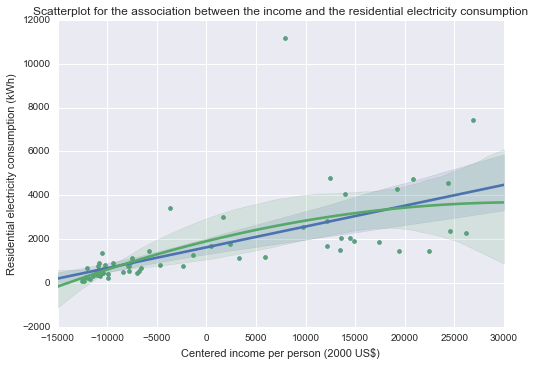

In [7]:
sns.regplot(x='income_c', y='electricity', data=centered_data)
sns.regplot(x='income_c', y='electricity', order=2, data=centered_data)
plt.xlabel('Centered income per person (2000 US$)')
plt.ylabel('Residential electricity consumption (kWh)')
plt.title('Scatterplot for the association between the income and the residential electricity consumption');

## OLS regression model

Test the linear regression model.

In [8]:
reg1 = smf.ols('electricity ~ income_c', data=centered_data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     39.69
Date:                Sun, 17 Jul 2016   Prob (F-statistic):           4.08e-08
Time:                        19:02:59   Log-Likelihood:                -530.88
No. Observations:                  61   AIC:                             1066.
Df Residuals:                      59   BIC:                             1070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1626.2603    189.670      8.574      0.000      1246.731  2005.790
income_c       0.0950      0.015      6.300      0.000         0.065     0.125
==============================================================================
Omnibus:                       80.246   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1091.497
Skew:                           3.660   Prob(JB):                    9.65e-238
Kurtosis:                      22.387   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test a second order polynomial regression model.

In [9]:
reg2 = smf.ols('electricity ~ income_c + I(income_c**2)', data=centered_data).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     20.43
Date:                Sun, 17 Jul 2016   Prob (F-statistic):           1.92e-07
Time:                        19:02:59   Log-Likelihood:                -530.31
No. Observations:                  61   AIC:                             1067.
Df Residuals:                      58   BIC:                             1073.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept         1904.3071    325.761      5.846      0.000      1252.225  2556.389
income_c             0.1117      0.022      5.095      0.000         0.068     0.156
I(income_c ** 2) -1.758e-06   1.68e-06     -1.049      0.298     -5.11e-06   1.6e-06
==============================================================================
Omnibus:                       76.908   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              912.307
Skew:                           3.504   Prob(JB):                    7.85e-199
Kurtosis:                      20.602   Cond. No.                     3.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the second OLS analysis, we can see that the coefficient corresponding to the second order term has a p-value of 0.3 > 0.05. Therefore we should keep only the linear term for our primary relation.

## Multiple regression

The multiple regression will be now carried out.

In [10]:
reg3 = smf.ols('electricity ~ income_c + oil_c + employ_c + urban_c', data=centered_data).fit()
reg3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     11.53
Date:                Sun, 17 Jul 2016   Prob (F-statistic):           6.76e-07
Time:                        19:03:00   Log-Likelihood:                -528.25
No. Observations:                  61   AIC:                             1067.
Df Residuals:                      56   BIC:                             1077.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1626.2603    186.470      8.721      0.000      1252.716  1999.804
income_c       0.0758      0.020      3.883      0.000         0.037     0.115
oil_c        123.7307    135.564      0.913      0.365      -147.837   395.298
employ_c      48.6765     25.901      1.879      0.065        -3.209   100.562
urban_c        2.3571     13.864      0.170      0.866       -25.415    30.129
==============================================================================
Omnibus:                       62.530   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              537.653
Skew:                           2.704   Prob(JB):                    1.78e-117
Kurtosis:                      16.502   Cond. No.                     1.26e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unexpectedly all explanatory variables except the primary one (income per person) should be discarded as their coefficients have p-values higher than 0.05.

Finally we will look at the diagnostic graphs

### Q-Q plot for normality

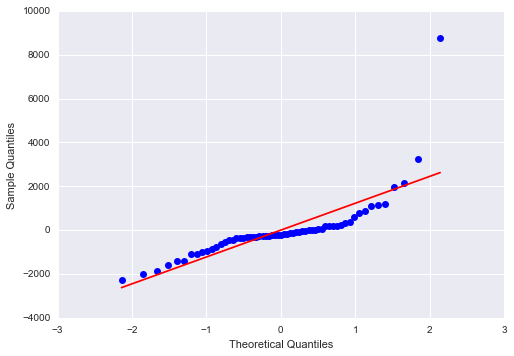

In [11]:
fig = sm.qqplot(reg1.resid, line='r')

The residuals do not follow correctly the line. Especially on the second half of the data. As our model is a single linear regression between residential electricity consumption and income per person, this means that the model is a poor predicator for country having larger income.

### Residuals plot

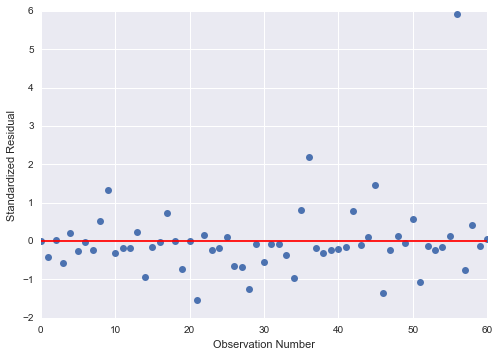

In [12]:
stdres = pd.DataFrame(reg1.resid_pearson)
plt.plot(stdres, 'o')
plt.axhline(y=0, color='r')
plt.ylabel('Standardized Residual')
plt.xlabel('Observation Number');

The previous plot highlights only one clear extreme outlier. So this confirm that the model is fine and could be improve.

### Partial regression plots

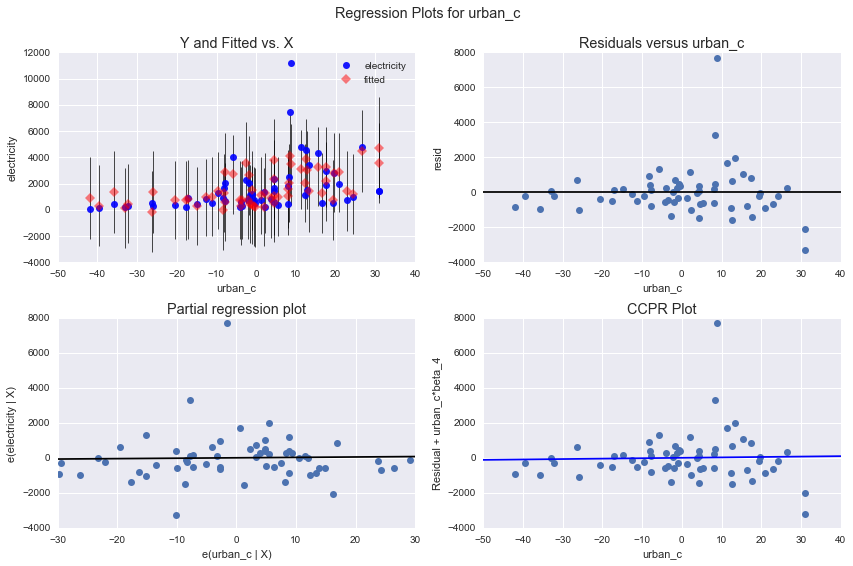

In [13]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(reg3, 'urban_c', fig);

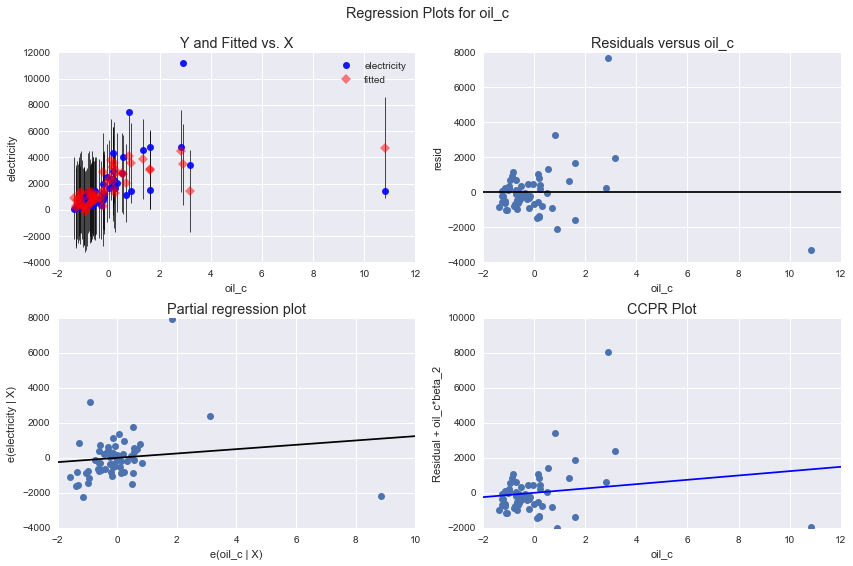

In [19]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(reg3, 'oil_c', fig);

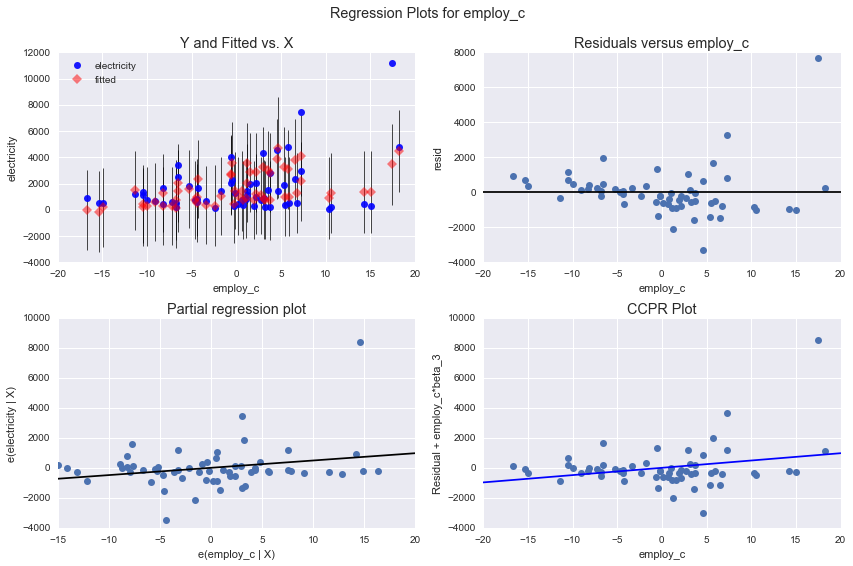

In [20]:
fig = plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(reg3, 'employ_c', fig);

The partial regression plots above are shown for the sake of the assignement as all variables but the income per person are non-significant in the multiple regression model. They all show that some extreme outliers will be present. 

And the partial plot against the urban rate has a horizontal partial regression line. This confirms that urban rate cannot improve the model.

### Leverage plot

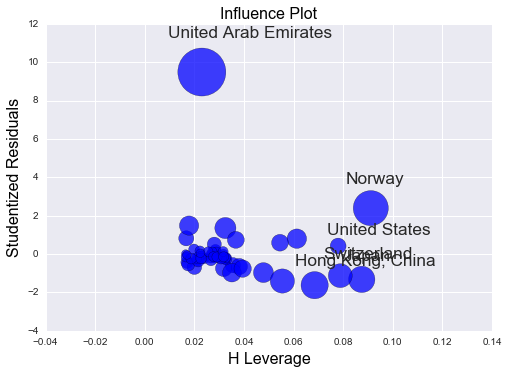

In [14]:
sm.graphics.influence_plot(reg1);

The leverage plot above shows that our extreme outlier *United Arab Emirates* does not have a strong influence on the estimation of the model coefficient. On the contrary *Norway*, the second border highest residual, has a important influence on the model estimation.

# Analysis of trouble case

To conclude this assignment, I would to take the same question but taking the oil consumption as primary explanatory variables.

Let's first see if a second order fits better than the linear regression model.

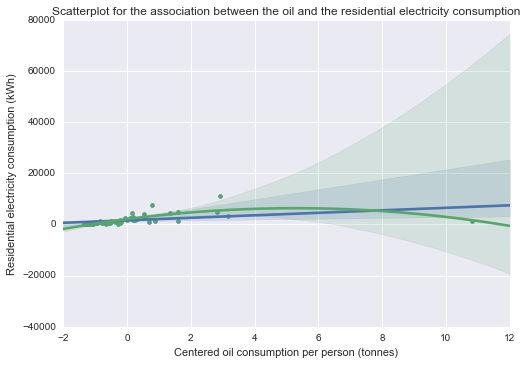

In [15]:
sns.regplot(x='oil_c', y='electricity', data=centered_data);
sns.regplot(x='oil_c', y='electricity', order=2, data=centered_data)
plt.xlabel('Centered oil consumption per person (tonnes)')
plt.ylabel('Residential electricity consumption (kWh)')
plt.title('Scatterplot for the association between the oil and the residential electricity consumption');

In [16]:
reg_oil1 = smf.ols('electricity ~ oil_c', data=centered_data).fit()
reg_oil1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     14.64
Date:                Sun, 17 Jul 2016   Prob (F-statistic):           0.000317
Time:                        19:03:39   Log-Likelihood:                -539.82
No. Observations:                  61   AIC:                             1084.
Df Residuals:                      59   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1626.2603    219.583      7.406      0.000      1186.877  2065.644
oil_c        487.8025    127.505      3.826      0.000       232.666   742.939
==============================================================================
Omnibus:                       47.149   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.869
Skew:                           1.975   Prob(JB):                     3.39e-60
Kurtosis:                      12.599   Cond. No.                         1.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
reg_oil2 = smf.ols('electricity ~ oil_c + I(oil_c**2)', data=centered_data).fit()
reg_oil2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            electricity   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     42.58
Date:                Sun, 17 Jul 2016   Prob (F-statistic):           4.18e-12
Time:                        19:03:39   Log-Likelihood:                -519.02
No. Observations:                  61   AIC:                             1044.
Df Residuals:                      58   BIC:                             1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept      2079.9567    168.620     12.335      0.000      1742.428  2417.486
oil_c          1617.3225    175.683      9.206      0.000      1265.655  1968.990
I(oil_c ** 2)  -152.9758     20.316     -7.530      0.000      -193.643  -112.309
==============================================================================
Omnibus:                       46.176   Durbin-Watson:                   1.686
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.695
Skew:                           2.004   Prob(JB):                     8.04e-51
Kurtosis:                      11.643   Cond. No.                         19.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the OLS analysis, the second order regression fits better the results. But the outlier far on the right seems to deteriorate the accuracy of the linear regression coefficient.

This is confirm by the leverage plot below. Singapore has a strong influence on the regression model. This country is a singularity having a huge oil consumption but a reasonable residential electricity consumption.

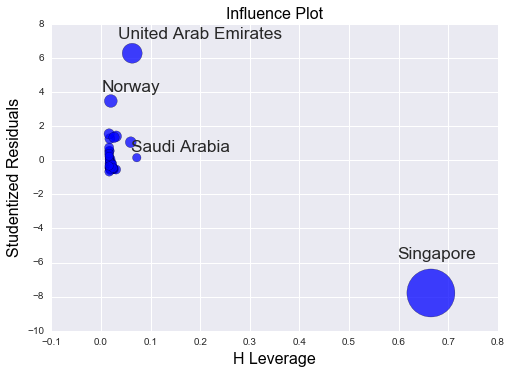

In [18]:
sm.graphics.influence_plot(reg_oil1);

Anyway the multiple regression shows that oil consumption is not a significant explanatory variable of the residential electricity consumption. Indeed in this case income per person is a cofounder; that is the real explanatory variable.

# Conclusion

In this assignment we have seen that only our primary explanatory variable (income per person) is a good to build a regression model on. However the R-Squared value being 0.4, there is still 60% of the electricity consumption variations not explain with the model; in particular the model performs poorly for country with higher income.

In the latter part, we use the tools described in this week to the trouble than can be raised by outlier data.